# Question

## classify the Size_Categorie using SVM

##### month	month of the year: 'jan' to 'dec'
##### day	day of the week: 'mon' to 'sun'
##### FFMC	FFMC index from the FWI system: 18.7 to 96.20
##### DMC	DMC index from the FWI system: 1.1 to 291.3
##### DC	DC index from the FWI system: 7.9 to 860.6
##### ISI	ISI index from the FWI system: 0.0 to 56.10
##### temp	temperature in Celsius degrees: 2.2 to 33.30
##### RH	relative humidity in %: 15.0 to 100
##### wind	wind speed in km/h: 0.40 to 9.40
##### rain	outside rain in mm/m2 : 0.0 to 6.4
##### Size_Categorie 	the burned area of the forest ( Small , Large)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,10)
plt.rcParams['figure.dpi'] = (150)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/yashvardhanpatil/Assignment-Dataset/main/Support%20Vector%20Machines/forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [5]:
df.drop(columns=['month','day'],inplace=True)

In [6]:
df.head(2)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small


In [7]:
df.isna().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
df['size_category'].nunique()

2

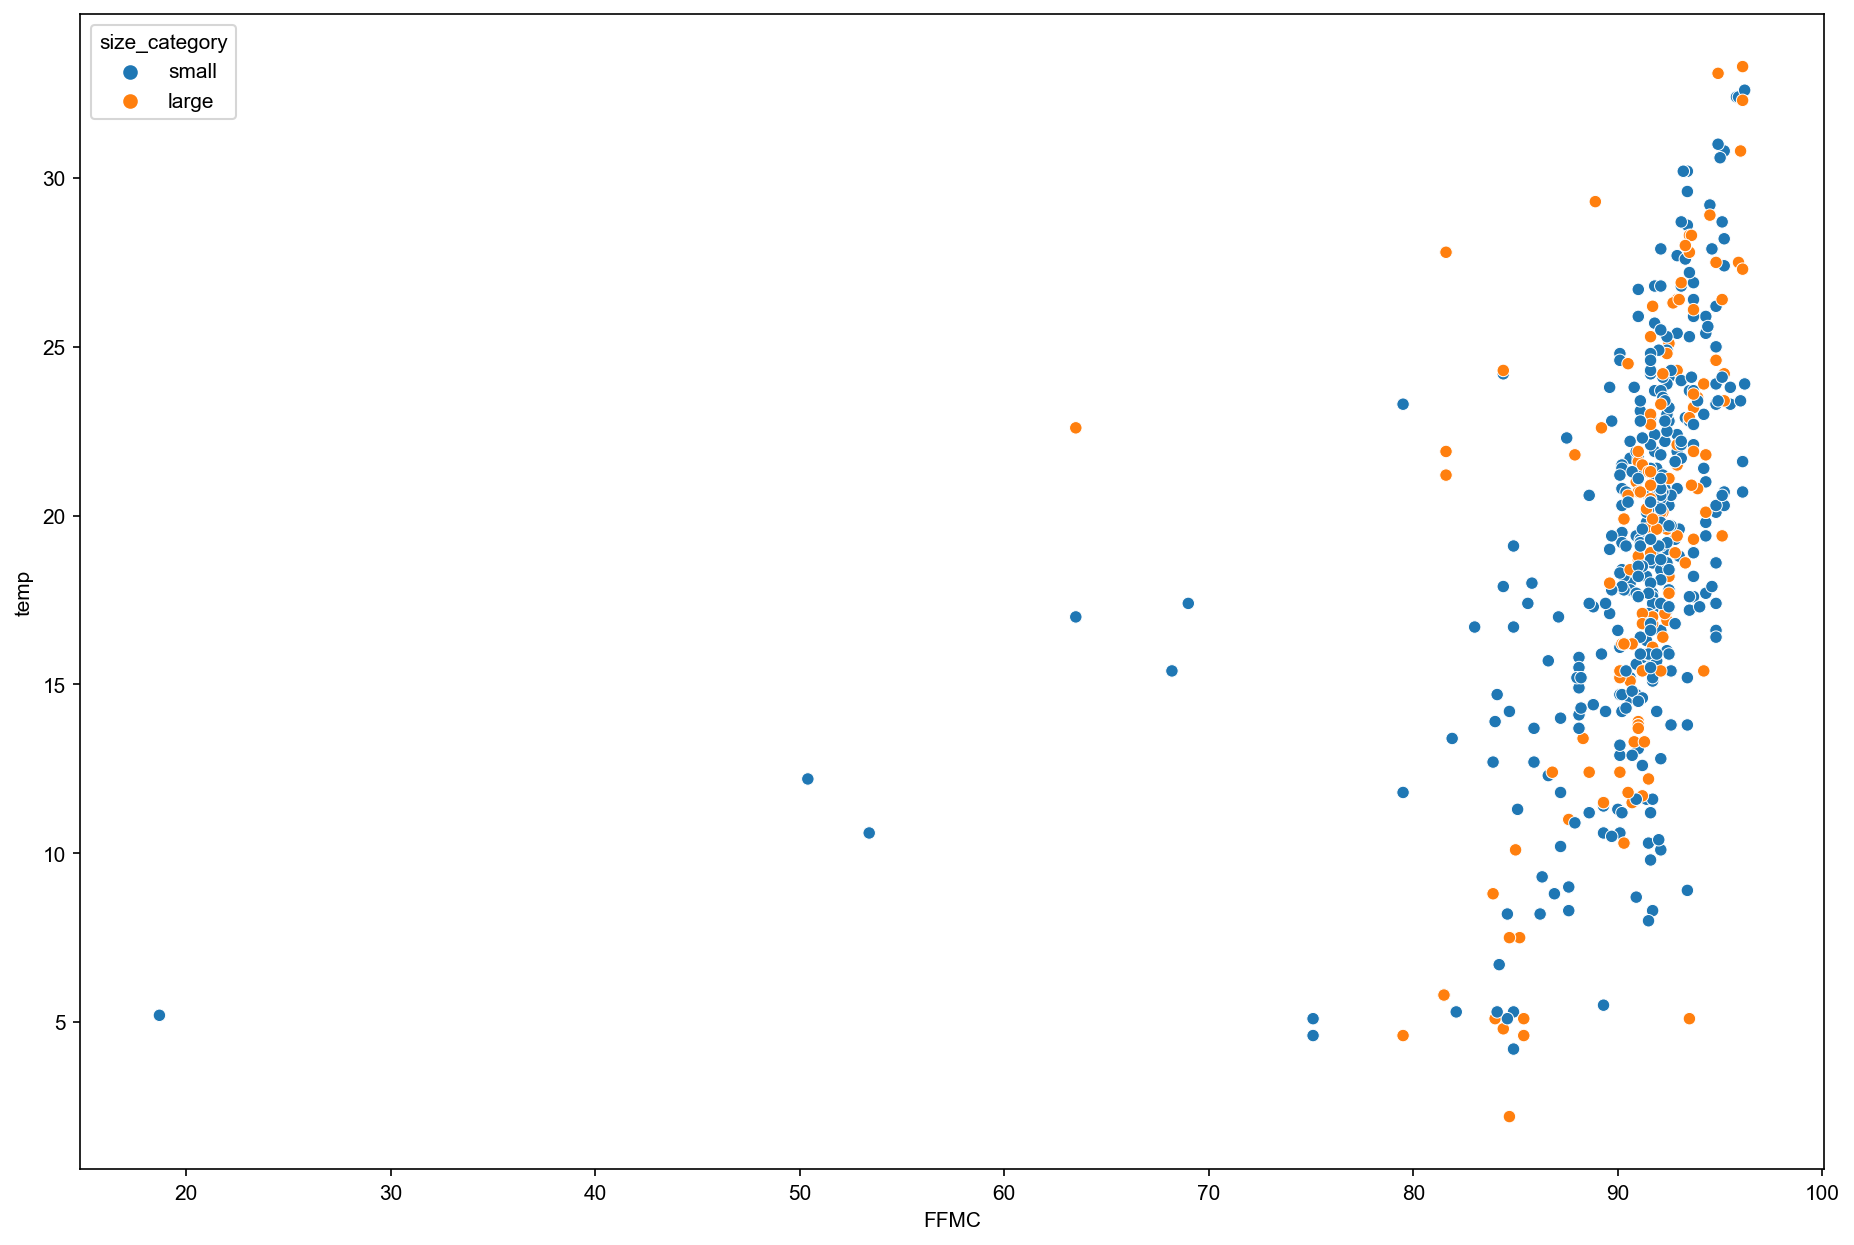

In [9]:
sns.scatterplot(df['FFMC'],df['temp'],hue=df['size_category'])
sns.set_style('darkgrid')

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
df['size_category'] = le.fit_transform(df['size_category'])

# Model Buliding

In [12]:
x = df.iloc[:,:-1]
y = df['size_category']


In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [14]:
svc = SVC(kernel='poly')
svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)

In [15]:
svc.score(xtrain,ytrain) , svc.score(xtest,ytest)

(0.7723970944309927, 0.7788461538461539)

# Hyperparameter Tuning

In [16]:
params = {
    'kernel' : ['poly','rbf','linear','sigmoid'],
    'C' : [0.1,0.01,0.001,1,10],
    'gamma' :[0.1,0.01,0.001,1,10]
}

In [17]:
grid = GridSearchCV(SVC(),param_grid=params,verbose=1)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 0.001, 1, 10],
                         'gamma': [0.1, 0.01, 0.001, 1, 10],
                         'kernel': ['poly', 'rbf', 'linear', 'sigmoid']},
             verbose=1)

In [18]:
grid.best_params_

{'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}

In [19]:
svc = SVC(kernel='linear',C=0.01,gamma=0.1)
svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)

In [20]:
svc.score(xtrain,ytrain) , svc.score(xtest,ytest)

(0.9903147699757869, 0.9807692307692307)

# Here we have Generalize Model